# Hierarchical Clustering

## Importing the libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [23]:
df = pd.read_csv('Mall_Customers.csv')

x = df.iloc[:, [3, 4]].values #just as discussd in "Kmeans" Clustering section.

In [24]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the dendrogram to find the optimal number of clusters

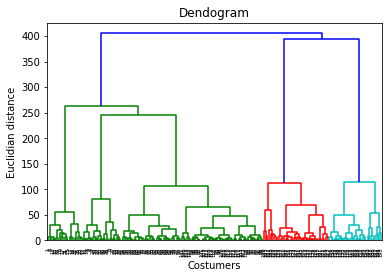

In [25]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendogram")
plt.xlabel("Costumers") #or: "observation points"
plt.ylabel("Euclidian distance")
plt.show()

In [26]:
# As we see above,in order to choose the optimal number of clsters, we should draw the horizantal line, and choose the largest distance between the colored horizantal lines within the clusters! which here is the 2nd one and the optimal cluster number is5.


## Training the Hierarchical Clustering model on the dataset

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #affinity = 'euclidian': the type of distance

y_hc = hc.fit_predict(x)

In [28]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## Visualising the clusters

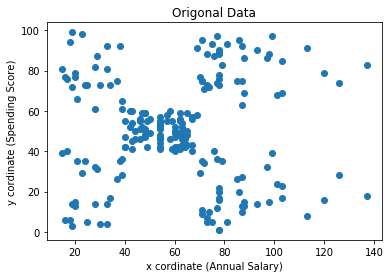

In [31]:
plt.scatter(x[:, 0], x[:, 1])
plt.title("Origonal Data")
plt.xlabel("x cordinate (Annual Salary)")
plt.ylabel("y cordinate (Spending Score)")
plt.show()

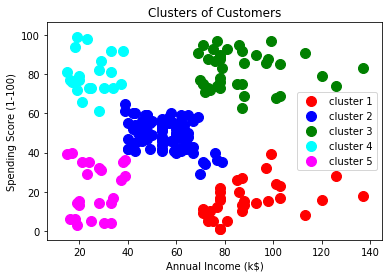

In [32]:
#plotting the clusters:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = "cluster 1")
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = "cluster 2")
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = "cluster 3")
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = "cluster 4")
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = "cluster 5")

#plotting the centroids:
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = "centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [33]:
# Cluster green = low income + low spending = no strategy! = neither protect nor hit with new and irresistable offers
# Cluster blue = high income + low spending = should send them better (improve) advertising to attract them more 
# Cluster cyan = low income + high spending = should be protected! = should not be hit with new and irresistable offers
# Cluster magenta = high income + high spending = graet! = should be hit with new and irresistable offers
# Cluster red = medium income + medium spending = shouldn't do too much here